# Prediksi Hepatitis C Berdasarkan Data Pasien Mesir dengan Berbagai Metode Diskritisasi

## 1. Persiapkan Dataset
 Langkah awal mengambil dataset "Hepatitis C Virus (HCV) for Egyptian Patients" dari UCI Machine Learning Repository menggunakan pustaka ucimlrepo. Setelah dataset di-fetch, data fitur (X) dan data target/label (y) diekstraksi dalam bentuk DataFrame. Selain itu, kode juga menampilkan informasi metadata dari dataset (seperti nama dataset, sumber, jumlah fitur, dll.) serta rincian masing-masing variabel (nama fitur, tipe data, deskripsi, dan apakah mengandung nilai yang hilang). Hal ini penting sebagai bagian dari proses data understanding untuk mengenali struktur dan karakteristik data sebelum dilakukan analisis atau pemodelan lebih lanjut.

 ### Sumber Dataset
 https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patients

In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fetch dataset HCV
dataset = fetch_ucirepo(id=503)

# Pisahkan fitur dan target
X = dataset.data.features
y = dataset.data.targets

# Gabungkan fitur dan target jadi 1 dataframe
df = pd.concat([X, y], axis=1)

# Tentukan target yang ingin diprediksi (contoh: Baselinehistological staging)
# Pastikan target bersifat kategorikal
target_col = 'Baselinehistological staging'

# Buang baris yang memiliki missing value
df = df.dropna(subset=[target_col])  # pastikan target tidak null
df = df.dropna()  # drop seluruh missing value agar training lancar

# Pisahkan kembali fitur dan label
X = df.drop(columns=target_col)
y = df[target_col]

# Encode label jika bertipe kategori non-numerik (jika perlu)
if y.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    y = LabelEncoder().fit_transform(y)

# Bagi data menjadi latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Buat dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi hasil
print("=== Evaluasi Model Random Forest ===")
print("Akurasi      :", accuracy_score(y_test, y_pred))
print("Presisi      :", precision_score(y_test, y_pred, average='weighted'))
print("Recall       :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score     :", f1_score(y_test, y_pred, average='weighted'))

# Cetak sebagian data
print("\n=== Contoh X Train ===")
print(X_train.head())

print("\n=== Contoh X Test ===")
print(X_test.head())

print("\n=== Y Test Asli ===")
print(y_test.head())

print("\n=== Y Prediksi ===")
print(pd.Series(y_pred[:5]))


=== Evaluasi Model Random Forest ===
Akurasi      : 0.3249097472924188
Presisi      : 0.33026739576697106
Recall       : 0.3249097472924188
F1 Score     : 0.32054640923122757

=== Contoh X Train ===
      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
630     35       2   35      2               2          2          2   
1155    57       2   24      2               2          1          1   
948     55       1   30      2               2          1          2   
944     61       2   23      2               2          1          2   
701     57       1   29      1               1          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
630                                  1          1                 2  ...   
1155                                 1          2                 2  ...   
948                                  1          1                 2  ...   
944                                  1          2               

## 2. Data Understanding

### a. Penjelasan fitur / variabel data
Berikut merupakan penjelasan mengenai fitur yang digunakan menggunakan dataset hepatitis c virus

| No | **Nama Fitur**                    | **Tipe**             | **Keterangan**                                                         |
| -- | --------------------------------- | -------------------- | ---------------------------------------------------------------------- |
| 1  | `Age`                             | Integer              | Usia pasien. Merupakan variabel demografi.                             |
| 2  | `Gender`                          | Binary               | Jenis kelamin pasien: \[Male], \[Female]. Termasuk variabel demografi. |
| 3  | `BMI`                             | Integer              | Body Mass Index (Indeks Massa Tubuh) pasien.                           |
| 4  | `Fever`                           | Binary               | Apakah pasien mengalami demam: \[Absent], \[Present].                  |
| 5  | `Nausea/Vomiting`                 | Binary               | Mual/muntah: \[Absent], \[Present].                                    |
| 6  | `Headache`                        | Binary               | Sakit kepala: \[Absent], \[Present].                                   |
| 7  | `Diarrhea`                        | Binary               | Diare: \[Absent], \[Present].                                          |
| 8  | `Fatigue & generalized bone ache` | Binary               | Kelelahan dan nyeri tulang: \[Absent], \[Present].                     |
| 9  | `Jaundice`                        | Binary               | Apakah mengalami penyakit kuning: \[Absent], \[Present].               |
| 10 | `Epigastric pain`                 | Binary               | Nyeri pada daerah epigastrik: \[Absent], \[Present].                   |
| 11 | `WBC`                             | Integer              | Jumlah sel darah putih (White Blood Cells).                            |
| 12 | `RBC`                             | Integer              | Jumlah sel darah merah (Red Blood Cells).                              |
| 13 | `HGB`                             | Integer              | Kadar Hemoglobin.                                                      |
| 14 | `Plat`                            | Integer              | Jumlah trombosit (Platelets).                                          |
| 15 | `AST 1`                           | Integer              | Kadar AST (Aspartate Transaminase) minggu pertama.                     |
| 16 | `ALT 1`                           | Integer              | Kadar ALT (Alanine Transaminase) minggu pertama.                       |
| 17 | `ALT4`                            | Integer              | Kadar ALT minggu ke-4.                                                 |
| 18 | `ALT 12`                          | Integer              | Kadar ALT minggu ke-12.                                                |
| 19 | `ALT 24`                          | Integer              | Kadar ALT minggu ke-24.                                                |
| 20 | `ALT 36`                          | Integer              | Kadar ALT minggu ke-36.                                                |
| 21 | `ALT 48`                          | Integer              | Kadar ALT minggu ke-48.                                                |
| 22 | `ALT after 24 w`                  | Integer              | Kadar ALT setelah 24 minggu.                                           |
| 23 | `RNA Base`                        | Integer              | Jumlah RNA pada baseline.                                              |
| 24 | `RNA 4`                           | Integer              | Jumlah RNA minggu ke-4.                                                |
| 25 | `RNA 12`                          | Integer              | Jumlah RNA minggu ke-12.                                               |
| 26 | `RNA EOT`                         | Integer              | Jumlah RNA di akhir perawatan (End Of Treatment).                      |
| 27 | `RNA EF`                          | Integer              | RNA Elongation Factor (jumlah RNA setelah masa pemulihan).             |
| 28 | `Baseline histological Grading`   | Categorical          | Kategori penilaian histologis awal (misalnya: tingkat peradangan).     |
| 29 | `Baselinehistological staging`    | Categorical (Target) | Target label: Tahap perkembangan fibrosis hati berdasarkan histologi.  |


### b.	Ekplorasi data tersebut

Kode Di bawah melakukan proses eksplorasi data awal (data exploration) untuk dataset Hepatitis C Virus for Egyptian Patients yang diambil dari UCI Machine Learning Repository. Langkah pertama yang dilakukan adalah memeriksa keberadaan missing value pada seluruh kolom dataset. Ini penting untuk memastikan kualitas data sebelum dilakukan pemodelan atau analisis lanjutan. Jika ditemukan nilai kosong, biasanya perlu dilakukan penanganan seperti imputasi (pengisian) atau penghapusan baris/kolom. Namun dalam hasil eksekusi kode ini, tampaknya seluruh kolom tidak memiliki missing value karena hasilnya menunjukkan 0 untuk semua kolom.

Selanjutnya, kode memeriksa outlier (nilai ekstrem) pada setiap kolom numerik menggunakan metode IQR (Interquartile Range). Outlier sering menjadi indikator data yang tidak lazim atau error pencatatan, dan dapat mempengaruhi kinerja model prediksi. Dengan menghitung Q1 (kuartil bawah), Q3 (kuartil atas), dan IQR, nilai-nilai yang berada di luar batas normal (Q1 - 1.5*IQR atau Q3 + 1.5*IQR) akan dihitung sebagai outlier. Terakhir, kode mencetak distribusi dari kelas target (Baselinehistological staging), yaitu tahapan kondisi hati pasien berdasarkan hasil histologi. Distribusi ini penting untuk memahami apakah kelas target seimbang (balanced) atau tidak — karena ketidakseimbangan kelas dapat menyebabkan bias dalam proses klasifikasi.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Ambil data dari UCI
dataset = fetch_ucirepo(id=503)
X = dataset.data.features
y = dataset.data.targets

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# ----------------------------
# 1. CEK MISSING VALUE
# ----------------------------
print("Missing Values :")
print(df.isnull().sum())
print()

# ----------------------------
# 2. CEK OUTLIER DENGAN IQR
# ----------------------------
print("Outlier Check (IQR Method):")
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outlier(s)")

print()

# ----------------------------
# 3. DISTRIBUSI TARGET (KELAS)
# ----------------------------
print("=== Distribusi Kelas Target ===")
target_col = 'Baselinehistological staging'
print(df[target_col].value_counts())
print()


Missing Values :
Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                          

### c.	Visualisasikan data

Berikut adalah penerapan visualisasi distribusi data numerik dari dataset Hepatitis C Virus for Egyptian Patients. Visualisasi ini bertujuan untuk membantu memahami sebaran (distribusi) dan mendeteksi keberadaan outlier pada masing-masing fitur numerik. Proses ini dilakukan untuk semua kolom bertipe numerik menggunakan dua jenis grafik: histogram dengan kurva KDE (Kernel Density Estimation) untuk melihat bentuk distribusi data, serta boxplot untuk mendeteksi nilai-nilai ekstrem secara visual.

Histplot (histogram) memberikan gambaran apakah data berdistribusi normal, miring ke kanan/kiri, atau memiliki distribusi tidak umum. Sementara itu, boxplot memudahkan identifikasi outlier dengan melihat titik-titik yang berada di luar whisker plot. Fitur yang memiliki sebaran terlalu lebar, asimetris, atau banyak outlier bisa jadi memerlukan transformasi data (misalnya log-scaling) atau penanganan khusus agar tidak mengganggu proses pelatihan model klasifikasi. Dengan visualisasi ini, kita mendapatkan insight yang lebih mendalam terhadap kualitas dan karakteristik masing-masing fitur numerik dalam dataset.

Menampilkan histogram dan boxplot fitur numerik...


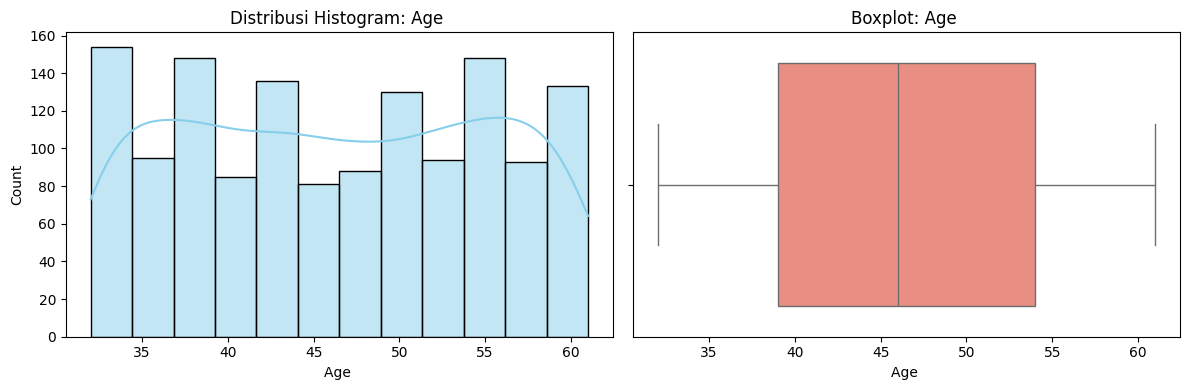

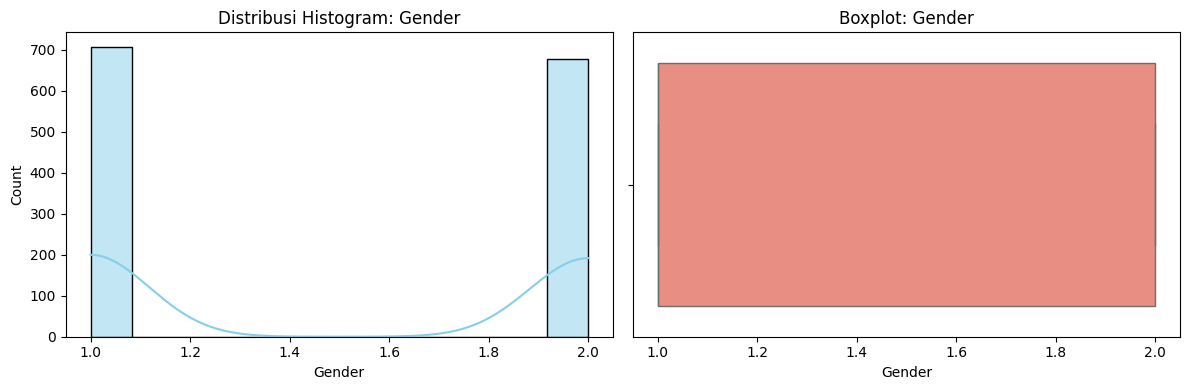

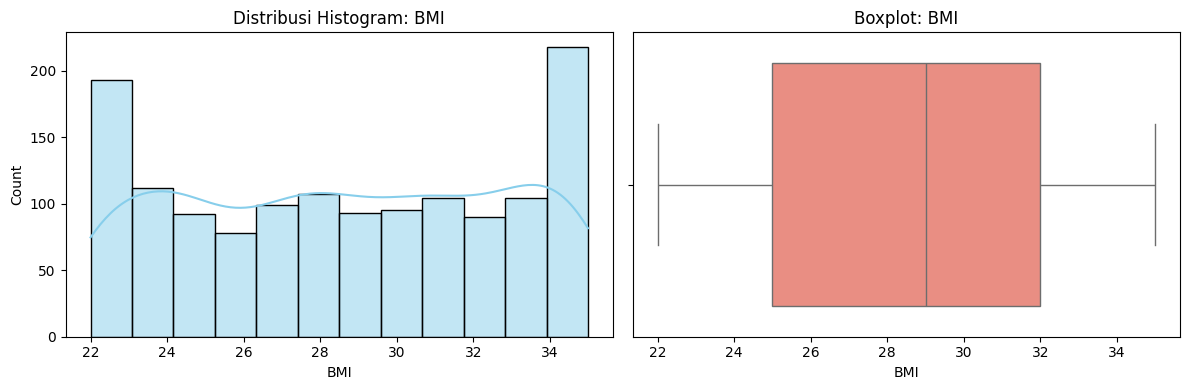

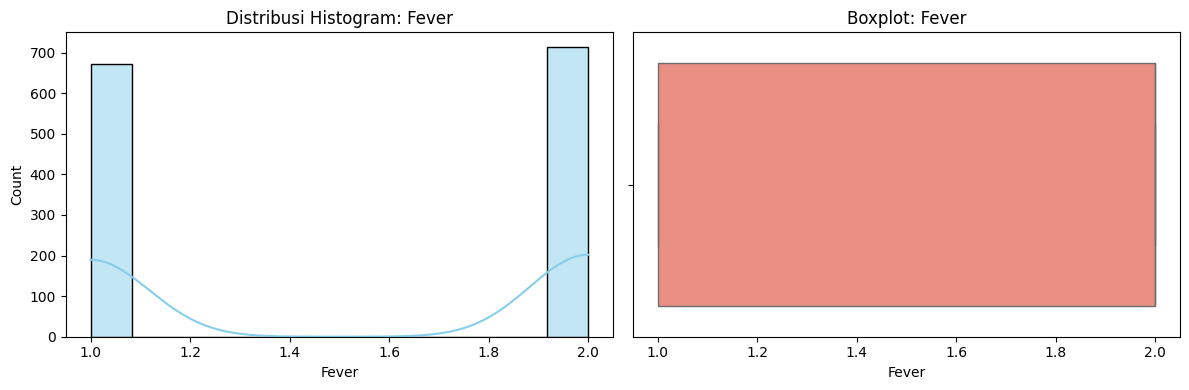

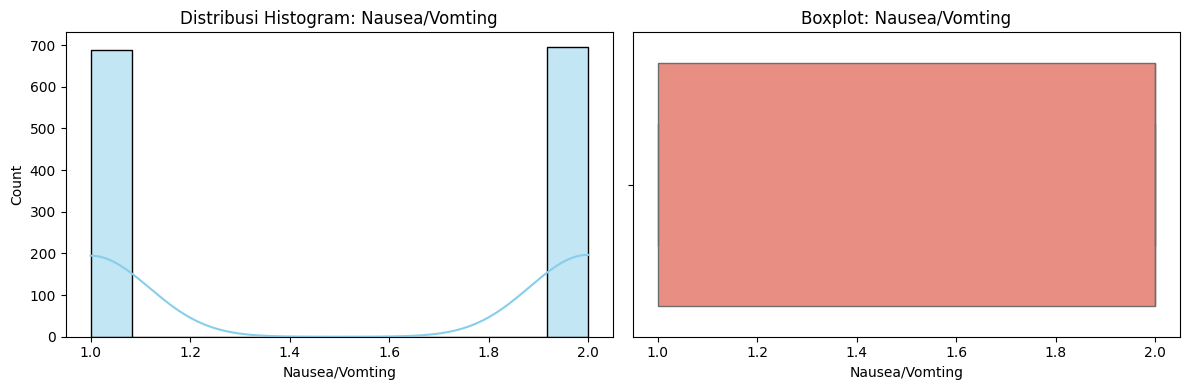

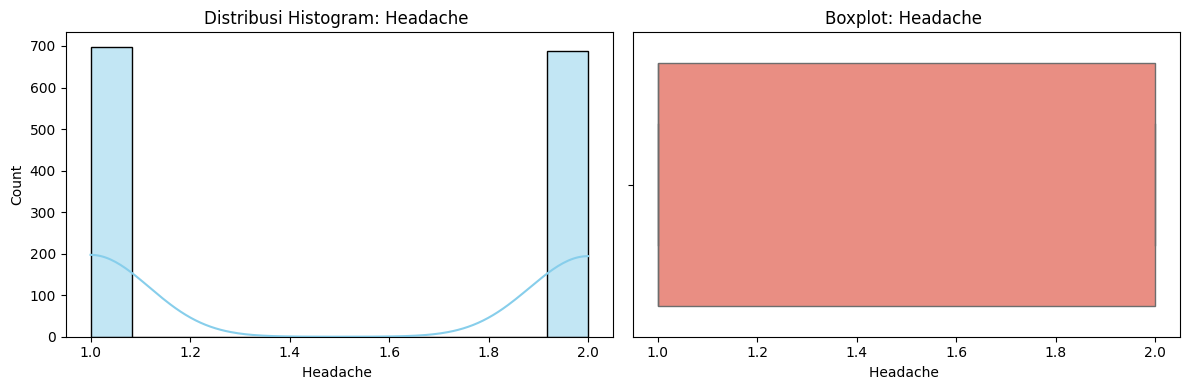

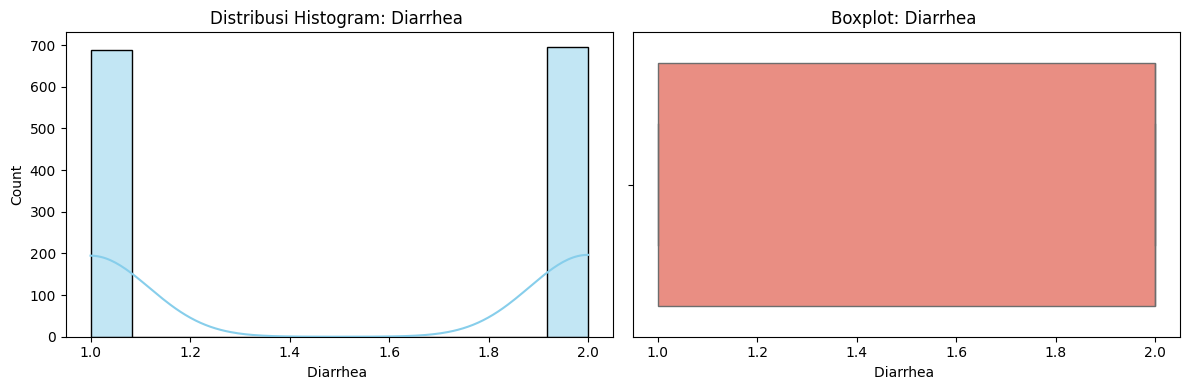

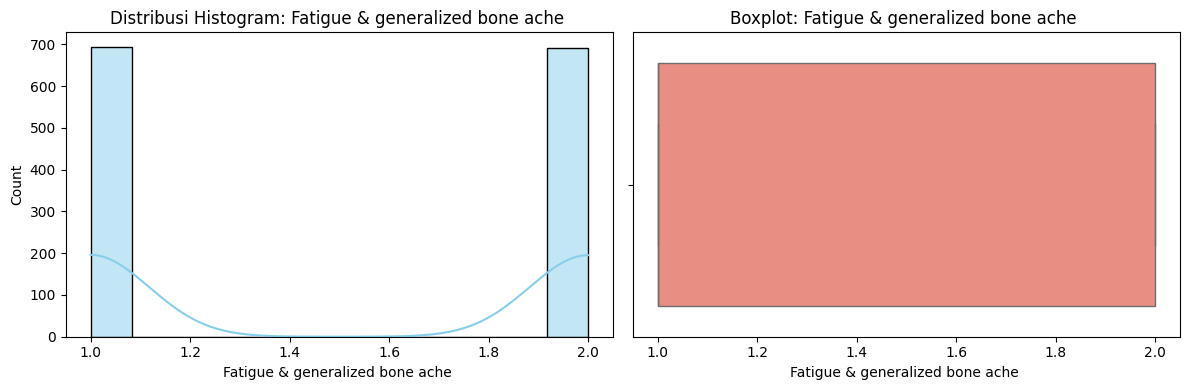

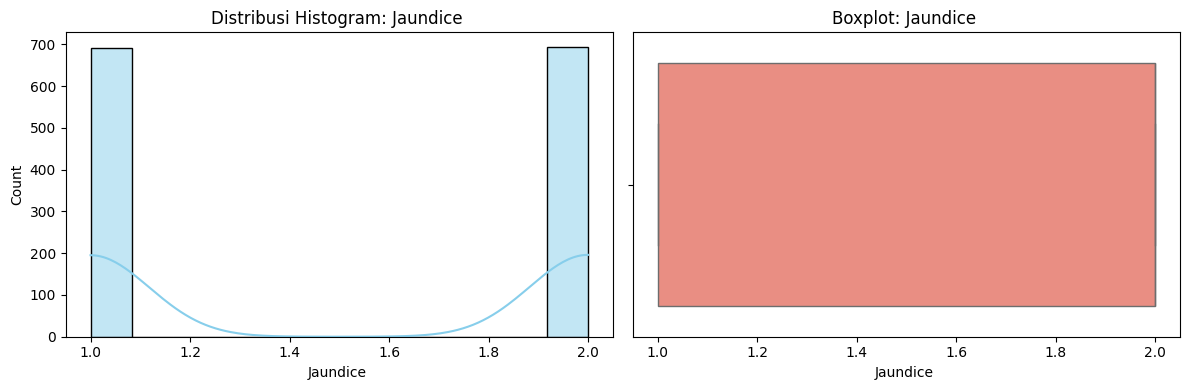

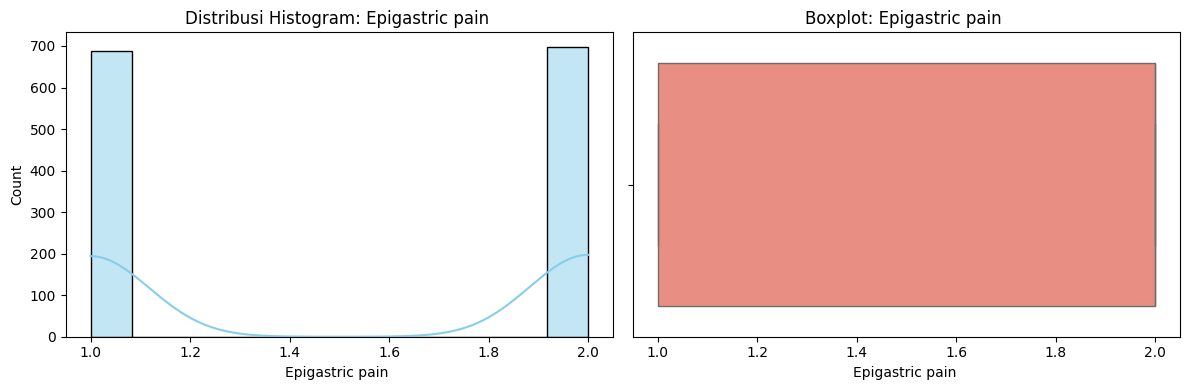

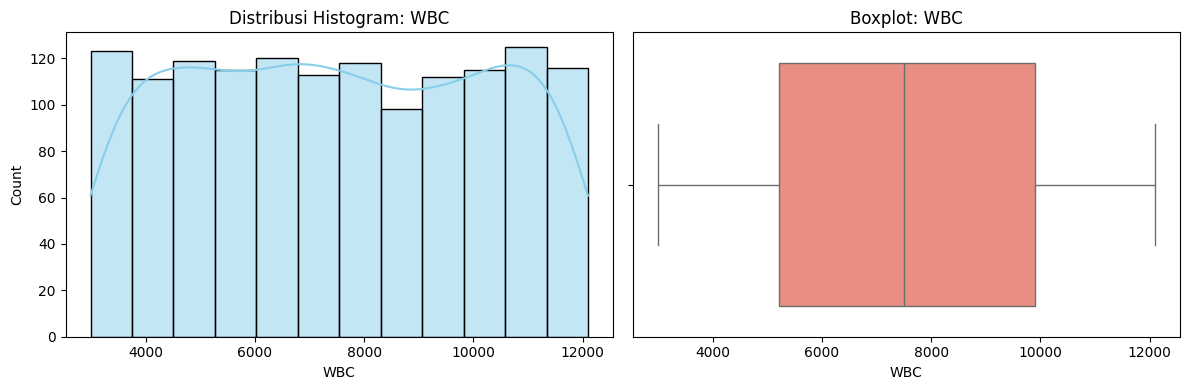

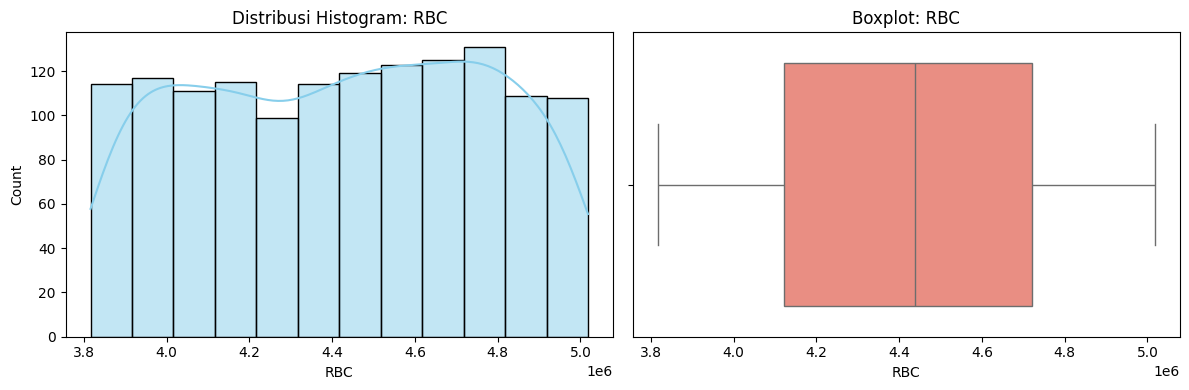

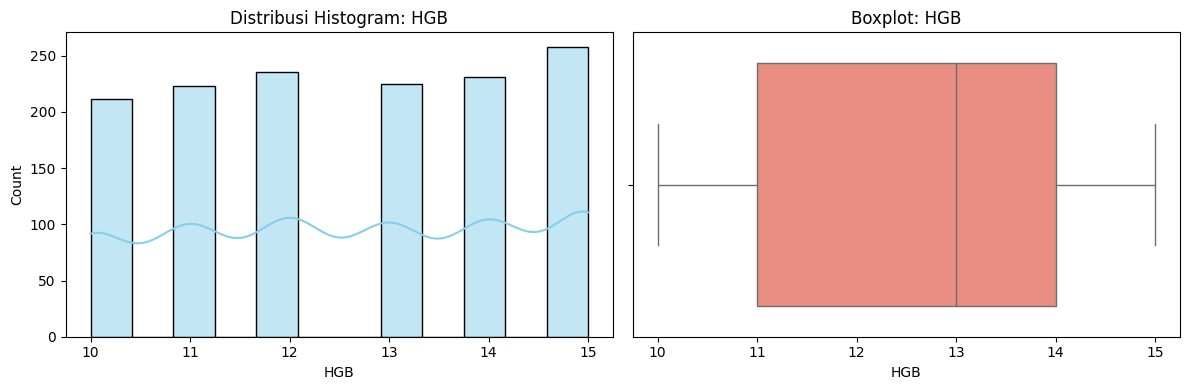

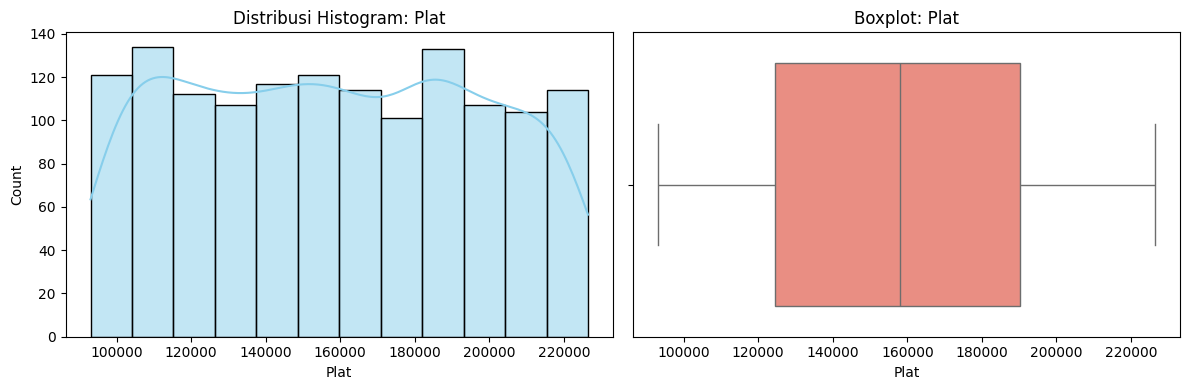

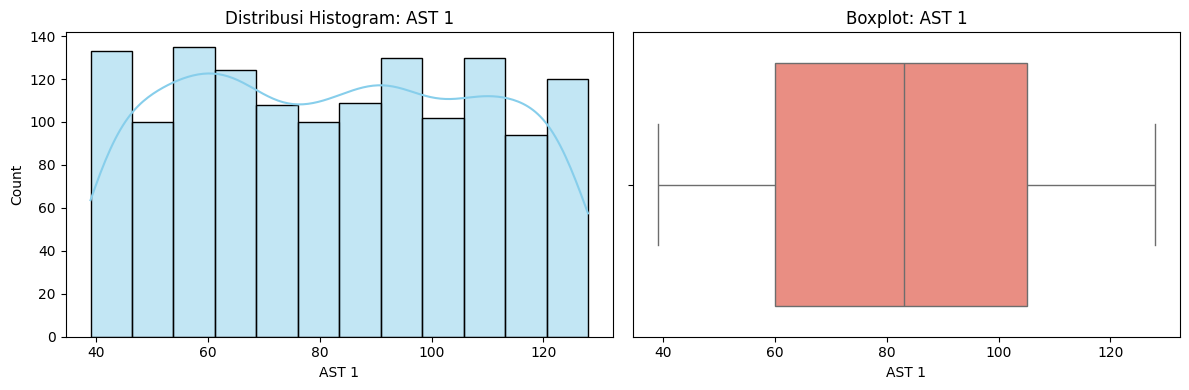

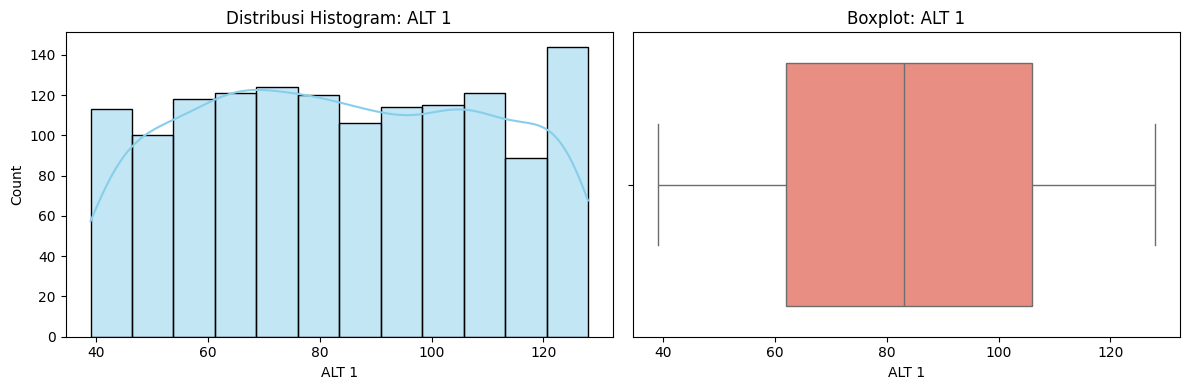

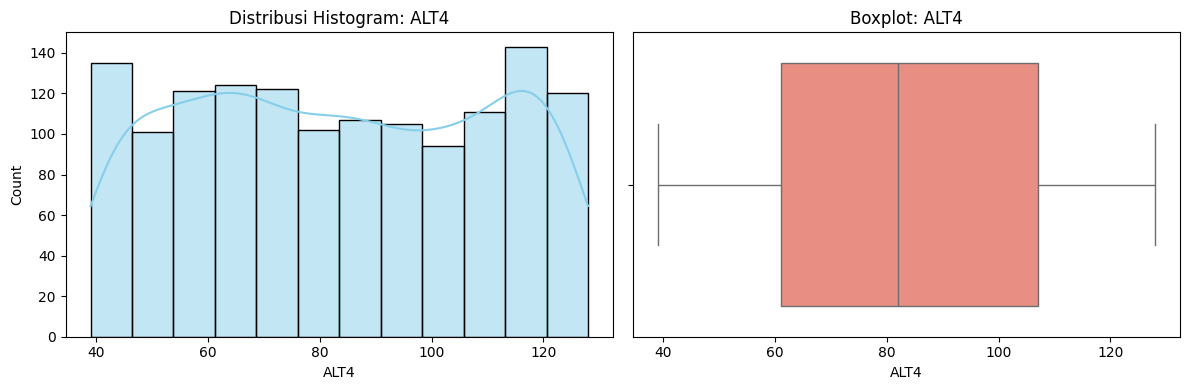

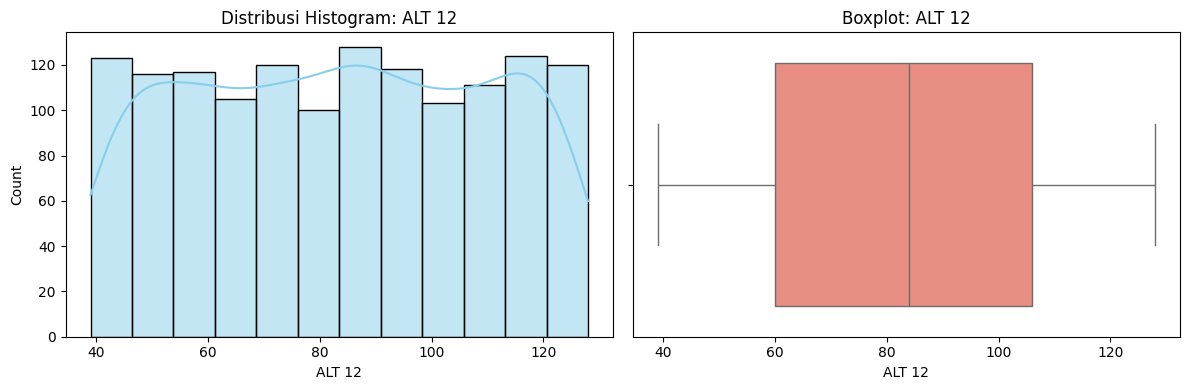

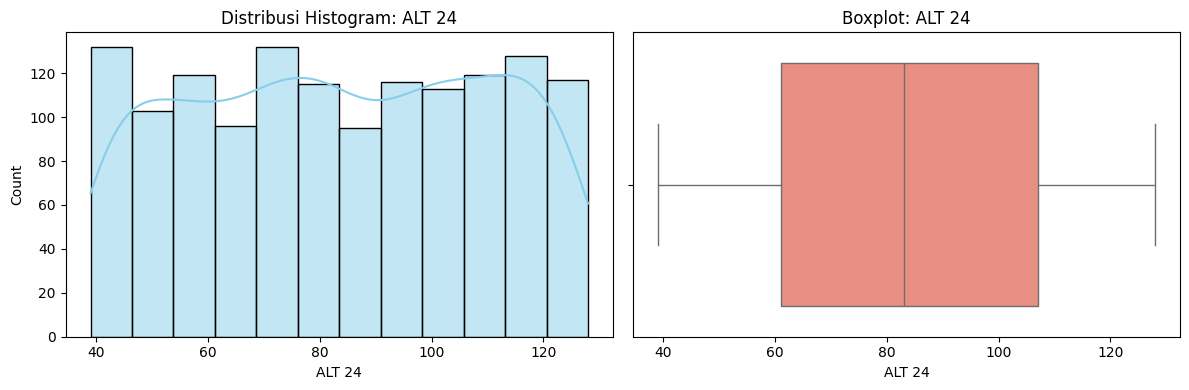

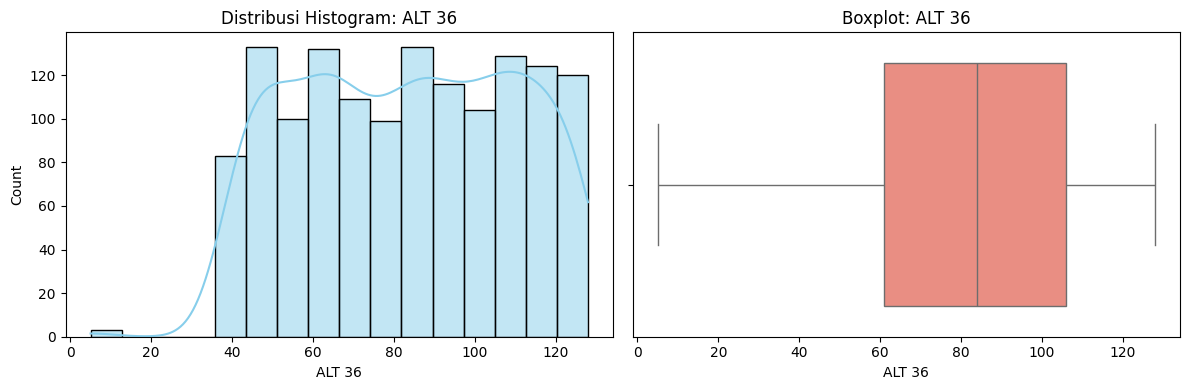

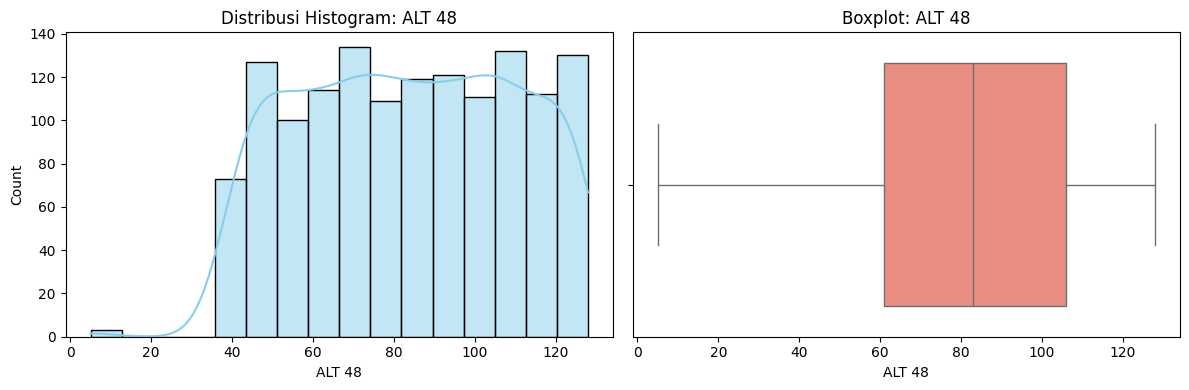

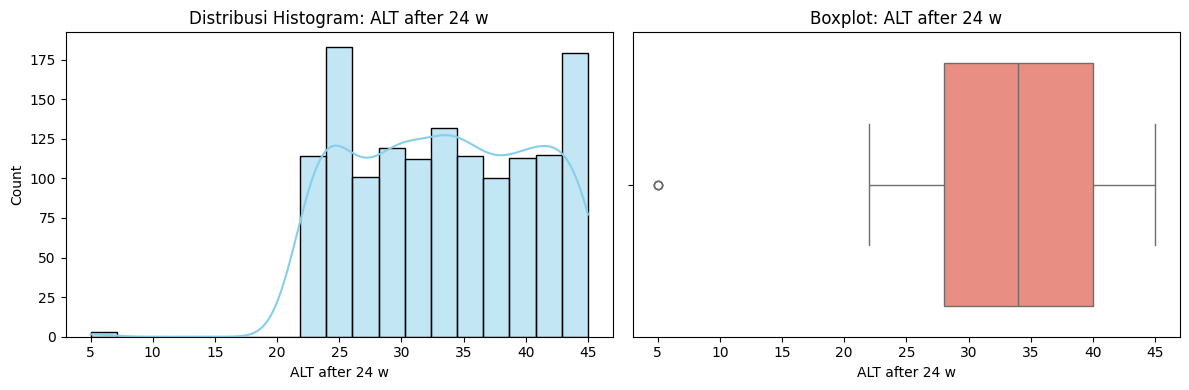

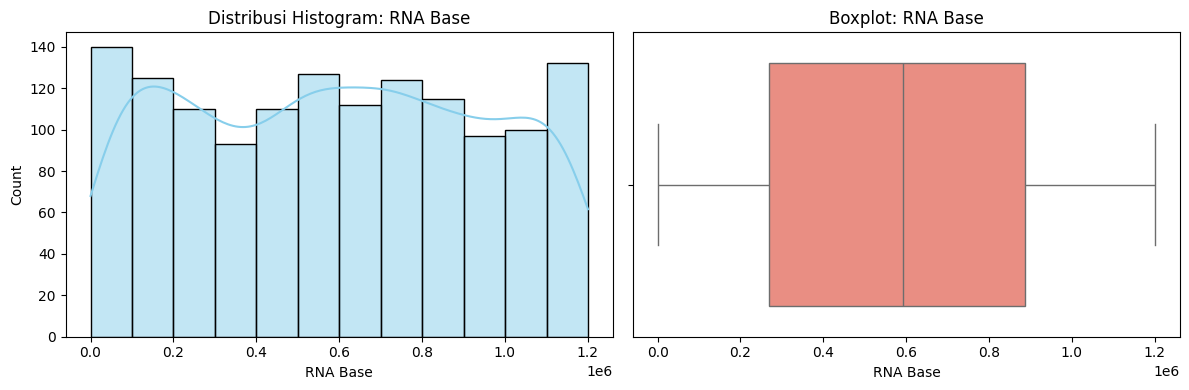

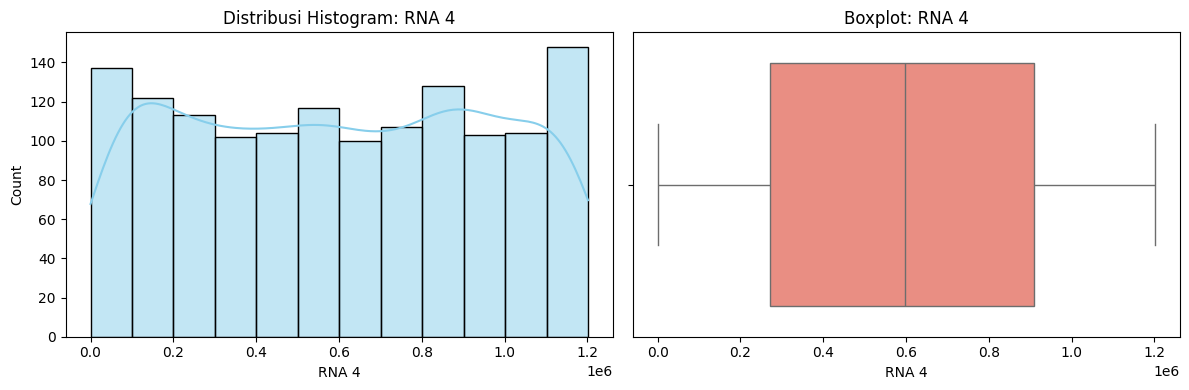

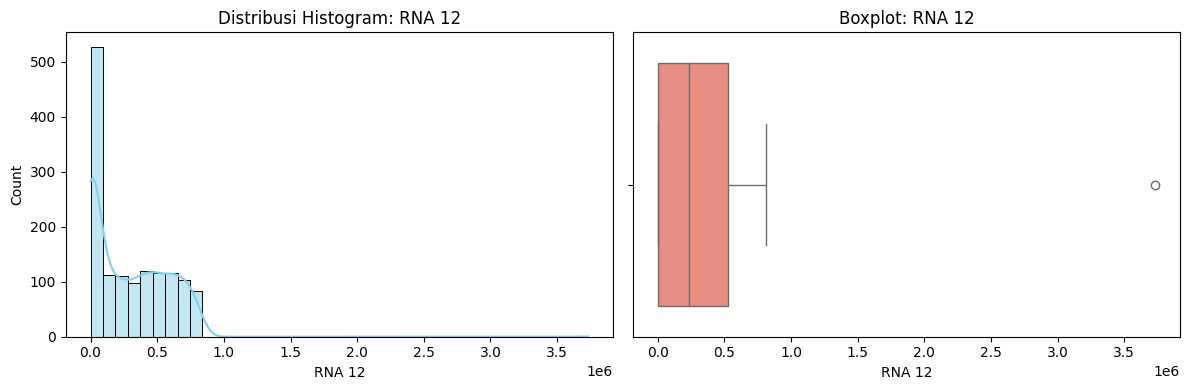

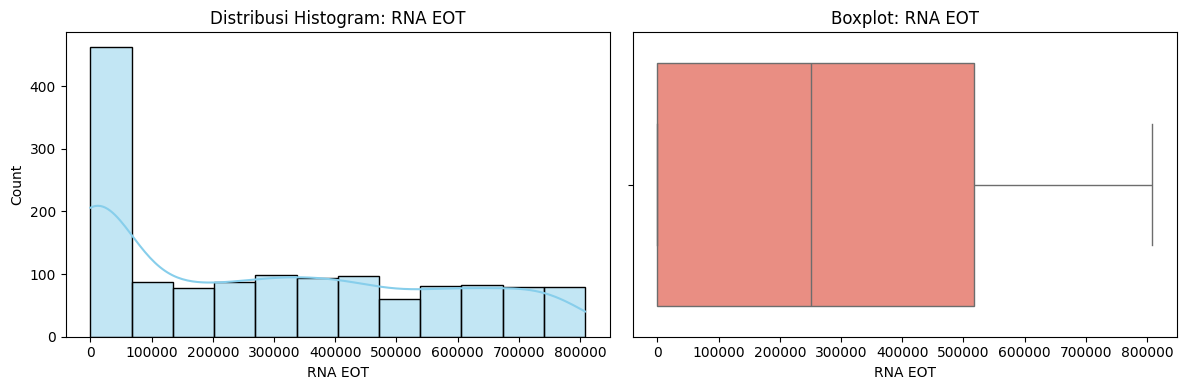

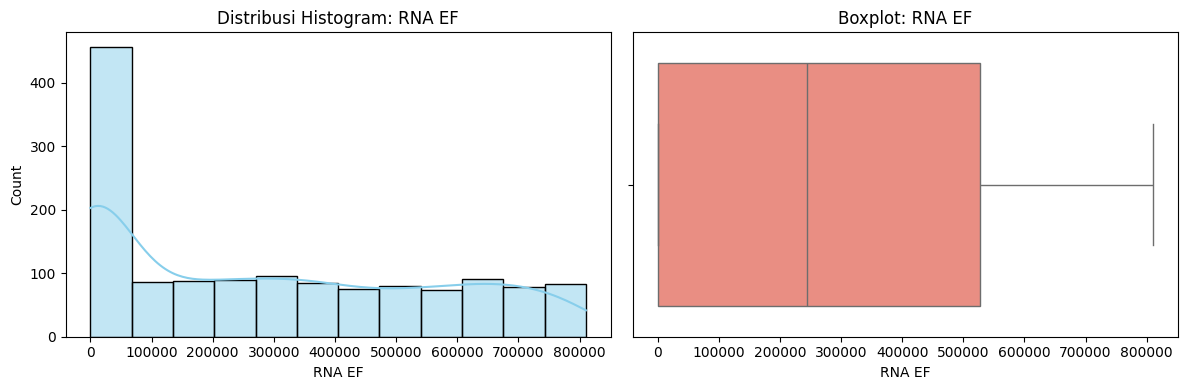

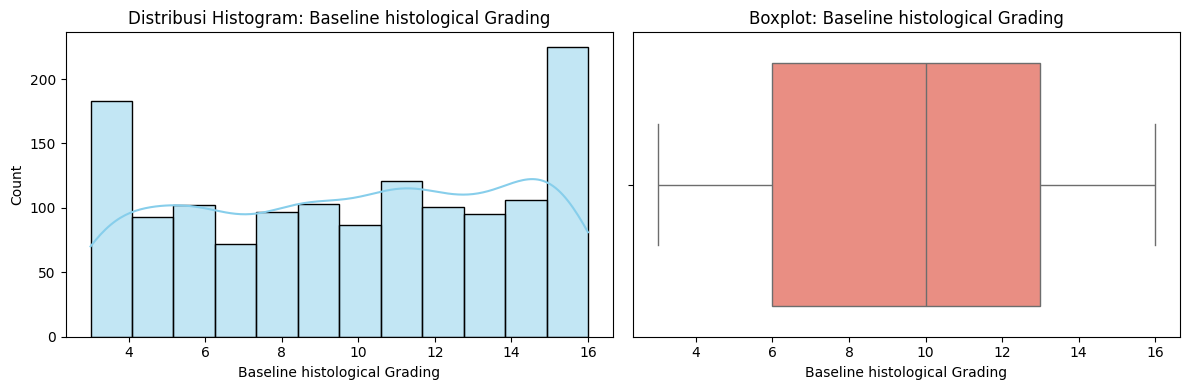

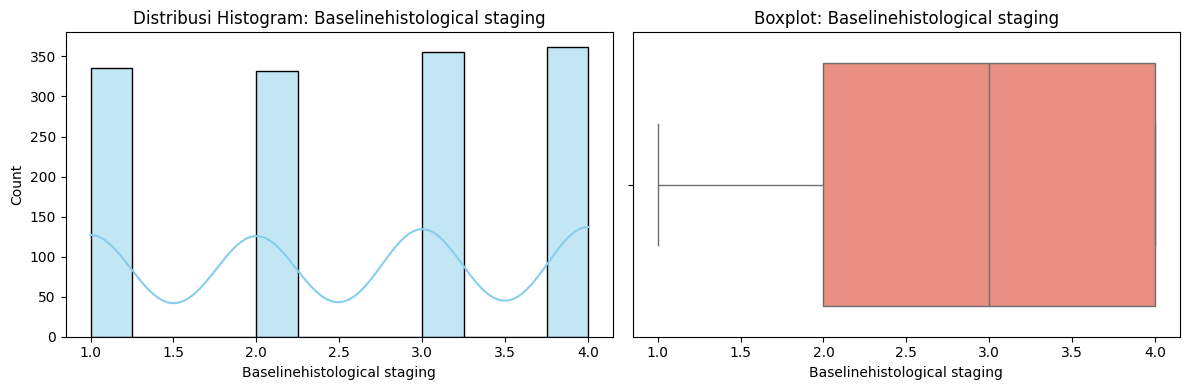

In [ ]:
# ----------------------------
# 4. VISUALISASI (Hist & Boxplot)
# ----------------------------
print("Menampilkan histogram dan boxplot fitur numerik...")
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribusi Histogram: {col}')

    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot: {col}')

    plt.tight_layout()
    plt.show()

## 3.	Prepocessing data

### a. Normalisasi Data
Kode di bawah melakukan proses preprocessing lengkap untuk dataset Hepatitis C Virus for Egyptian Patients dari UCI. Langkah pertama adalah mengambil data, lalu mengidentifikasi fitur numerik dan melakukan normalisasi menggunakan MinMaxScaler. Normalisasi ini penting agar semua fitur numerik memiliki rentang nilai yang seragam (antara 0 dan 1), sehingga model machine learning yang sensitif terhadap skala data — seperti KNN atau neural network — dapat belajar dengan lebih stabil. Setelah itu, fitur kategori seperti Gender juga diubah menjadi representasi numerik menggunakan LabelEncoder, yang mengubah label teks (misalnya 'Male', 'Female') menjadi angka (0 dan 1).

Langkah selanjutnya adalah memisahkan data menjadi data latih dan data uji menggunakan train_test_split, dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Ini dilakukan agar model dapat dilatih di satu subset data dan diuji pada data yang belum pernah dilihat sebelumnya, guna mengukur kemampuannya melakukan generalisasi. Akhirnya, kode mencetak ukuran dataset hasil split dan contoh isi X_train untuk memastikan preprocessing berjalan dengan benar. Dengan pipeline ini, data sudah siap digunakan untuk pelatihan model prediksi seperti Decision Tree, Random Forest, atau algoritma lainnya.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# 1. Ambil dataset dari UCI
dataset = fetch_ucirepo(id=503)
X = dataset.data.features
y = dataset.data.targets

# 2. Deteksi fitur numerik
numeric_cols = X.select_dtypes(include='number').columns

# 3. Normalisasi data numerik dengan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# 4. Encoding fitur kategori (misalnya: Gender)
X_encoded = X_scaled.copy()
if 'Gender' in X_encoded.columns:
    le = LabelEncoder()
    X_encoded['Gender'] = le.fit_transform(X_encoded['Gender'])  # Male=1, Female=0

# 5. Ambil target dan pisahkan data menjadi train dan test
target_col = 'Baselinehistological staging'
y_final = y[target_col]
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_final, test_size=0.2, random_state=42)

# 6. Tampilkan bentuk data akhir
print("Bentuk data X_train:", X_train.shape)
print("Bentuk data X_test :", X_test.shape)
print("Contoh data X_train:")
print(X_train.head())


Bentuk data X_train: (1108, 28)
Bentuk data X_test : (277, 28)
Contoh data X_train:
          Age   Gender       BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
630   0.103448       1  1.000000    1.0             1.0        1.0        1.0   
1155  0.862069       1  0.153846    1.0             1.0        0.0        0.0   
948   0.793103       0  0.615385    1.0             1.0        0.0        1.0   
944   1.000000       1  0.076923    1.0             1.0        0.0        1.0   
701   0.862069       0  0.538462    0.0             0.0        1.0        1.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
630                                0.0        0.0               1.0  ...   
1155                               0.0        1.0               1.0  ...   
948                                0.0        0.0               1.0  ...   
944                                0.0        1.0               0.0  ...   
701                                0.0        0.0

### b. Encoding kategori

Kode tersebut berfungsi untuk melakukan encoding atau konversi data kategori menjadi data numerik, agar bisa digunakan dalam algoritma machine learning. Data yang diambil berasal dari dataset Hepatitis C Virus (HCV) milik pasien asal Mesir. Langkah pertama yaitu meng-copy data asli ke variabel baru (X_encoded dan y_encoded) untuk diproses. Fitur kategori seperti Gender, yang memiliki nilai teks seperti "Male" atau "Female", diubah menjadi angka menggunakan LabelEncoder dari scikit-learn. Mapping hasil encoding juga ditampilkan untuk menunjukkan bahwa, misalnya, 'Female' diubah menjadi 0 dan 'Male' menjadi 1.

Selanjutnya, kode juga mengecek apakah kolom target (Baselinehistological staging) berupa kategori (objek atau tipe kategori), dan jika ya, maka kolom tersebut juga diubah menjadi angka. Ini penting karena banyak algoritma klasifikasi hanya bisa bekerja dengan target numerik, bukan teks. Hasil encoding pada kolom fitur Gender dan target Baselinehistological staging ditampilkan sebagai contoh. Dengan demikian, data sudah dalam bentuk siap pakai untuk pelatihan model prediksi atau klasifikasi.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# 1. Ambil dataset dari UCI
dataset = fetch_ucirepo(id=503)
X = dataset.data.features
y = dataset.data.targets

# 2. Salin data untuk encoding
X_encoded = X.copy()
y_encoded = y.copy()

# 3. Encoding fitur kategori (misalnya Gender)
if 'Gender' in X_encoded.columns:
    le_gender = LabelEncoder()
    X_encoded['Gender'] = le_gender.fit_transform(X_encoded['Gender'])  # Male=1, Female=0
    print("Mapping Gender:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

# 4. Encoding target label (jika target bertipe kategorikal)
target_col = 'Baselinehistological staging'
if y_encoded[target_col].dtype == 'object' or y_encoded[target_col].dtype.name == 'category':
    le_target = LabelEncoder()
    y_encoded[target_col] = le_target.fit_transform(y_encoded[target_col])
    print("Mapping Target (Staging):", dict(zip(le_target.classes_, le_target.transform(le_target.classes_))))

# 5. Hasil encoding
print("\nContoh hasil encoding:")
print(X_encoded[['Gender']].head())
print(y_encoded.head())


Mapping Gender: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}

Contoh hasil encoding:
   Gender
0       0
1       0
2       0
3       1
4       0
   Baselinehistological staging
0                             2
1                             2
2                             4
3                             3
4                             1


## 4. klasifikasi terhadap data

Kode di bawah digunakan untuk memuat dan memproses dataset dari UCI Machine Learning Repository dengan ID 503, kemudian mengimplementasikan dan membandingkan tiga model klasifikasi: Gaussian Naive Bayes, Decision Tree, dan K-Nearest Neighbors (KNN). Dataset yang digunakan memiliki target 'Baselinehistological staging', yang dikonversi menjadi label biner: nilai 1 dan 2 diklasifikasikan sebagai 0 (misalnya kondisi ringan), dan nilai 3 serta 4 sebagai 1 (misalnya kondisi berat). Data kemudian dipisahkan menjadi fitur (X) dan label (y), dan semua nilai kosong pada fitur diimputasi menggunakan rata-rata (mean) agar model tidak gagal saat pelatihan.

Selanjutnya, data dibagi menjadi dua bagian: 80% untuk pelatihan (training) dan 20% untuk pengujian (testing). Karena model Gaussian Naive Bayes dan KNN sensitif terhadap skala data, fitur-fitur tersebut dinormalisasi menggunakan MinMaxScaler agar semua nilai berada dalam rentang 0 hingga 1. Model Decision Tree tidak memerlukan normalisasi karena berbasis pada pemisahan nilai, bukan perhitungan jarak atau probabilitas. Setelah pelatihan selesai untuk ketiga model, prediksi hasil dari masing-masing model ditampilkan, bersama dengan data pelatihan, data pengujian, dan label pengujian.

Secara keseluruhan, kode ini berguna untuk membandingkan performa awal ketiga model klasifikasi terhadap dataset biner yang telah diproses. Meskipun belum ditambahkan metrik evaluasi seperti akurasi, precision, recall, atau confusion matrix, struktur kode ini sudah mempersiapkan seluruh pipeline dari pengambilan data, preprocessing, pelatihan, hingga prediksi. Langkah selanjutnya yang disarankan adalah menambahkan evaluasi performa agar bisa menilai model mana yang paling cocok untuk digunakan dalam konteks ini.

In [22]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ambil dataset
dataset = fetch_ucirepo(id=503)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# Pilih target dan ubah jadi biner: 1–2 => 0, 3–4 => 1
target_col = 'Baselinehistological staging'
df = df.dropna(subset=[target_col])
df[target_col] = df[target_col].replace({1: 0, 2: 0, 3: 1, 4: 1})

# Pisahkan fitur dan label
X = df.drop(columns=target_col)
y = df[target_col]

# Imputasi nilai kosong
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Gunakan MinMaxScaler untuk model Naive Bayes & KNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============ 1. Gaussian Naive Bayes ============
print("\n==> Melatih model: Gaussian Naive Bayes")
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_model.predict(X_test_scaled)

# ============ 2. Decision Tree ============
print("\n==> Melatih model: Decision Tree")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# ============ 3. K-Nearest Neighbors ============
print("\n==> Melatih model: K-Nearest Neighbors")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# ================================
# Tampilkan Hasil
# ================================
print("\n================ Y PREDIKSI (Naive Bayes) =================")
print(y_pred_gnb)

print("\n================ Y PREDIKSI (Decision Tree) ================")
print(y_pred_dt)

print("\n================ Y PREDIKSI (KNN) ==========================")
print(y_pred_knn)

print("\n==================== X TRAINING ============================")
print(pd.DataFrame(X_train, columns=X.columns))

print("\n==================== X TESTING =============================")
print(pd.DataFrame(X_test, columns=X.columns))

print("\n==================== Y TESTING =============================")
print(y_test.reset_index(drop=True))



==> Melatih model: Gaussian Naive Bayes

==> Melatih model: Decision Tree

==> Melatih model: K-Nearest Neighbors

================ Y PREDIKSI (Naive Bayes) =================
[1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1]

================ Y PREDIKSI (Decision Tree) ================
[0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 

# 5.	Evaluasi model
Berikut adalah penerapan evaluasi model klasifikasi terhadap data Hepatitis C Virus for Egyptian Patients menggunakan empat algoritma machine learning, yaitu Decision Tree, Naive Bayes, Random Forest, dan K-Nearest Neighbors (KNN). Evaluasi dilakukan dengan menghitung akurasi, confusion matrix, dan classification report untuk masing-masing model. Nilai akurasi dari semua model disimpan dalam dictionary model_scores agar bisa dibandingkan secara otomatis.

Setelah semua model dievaluasi, sistem akan menentukan model dengan akurasi tertinggi menggunakan fungsi max(). Hasil akhirnya akan mencetak nama model terbaik beserta nilai akurasinya secara rinci. Dengan pendekatan ini, kamu dapat langsung mengetahui algoritma mana yang paling baik performanya dalam mengklasifikasikan staging penyakit hepatitis berdasarkan data pasien.


==> Melatih model: Gaussian Naive Bayes

==> Melatih model: Decision Tree

==> Melatih model: K-Nearest Neighbors (k=5)

======= Evaluasi Model: Gaussian Naive Bayes =======
Akurasi  : 0.5271
Presisi  : 0.5202
Recall   : 0.6522
F1 Score : 0.5788


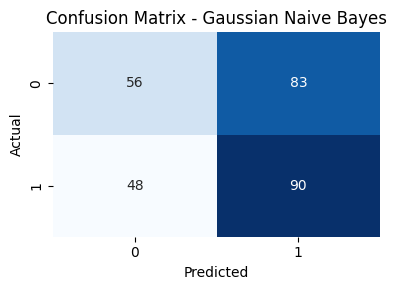


======= Evaluasi Model: Decision Tree =======
Akurasi  : 0.4729
Presisi  : 0.473
Recall   : 0.5072
F1 Score : 0.4895


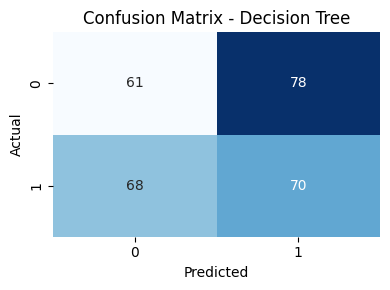


======= Evaluasi Model: K-Nearest Neighbors (k=5) =======
Akurasi  : 0.5668
Presisi  : 0.5592
Recall   : 0.6159
F1 Score : 0.5862


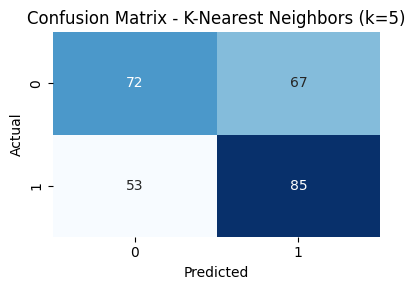

In [23]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil dataset
dataset = fetch_ucirepo(id=503)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# Pilih target dan ubah jadi biner: 1–2 => 0, 3–4 => 1
target_col = 'Baselinehistological staging'
df = df.dropna(subset=[target_col])
df[target_col] = df[target_col].replace({1: 0, 2: 0, 3: 1, 4: 1})

# Pisahkan fitur dan label
X = df.drop(columns=target_col)
y = df[target_col]

# Imputasi nilai kosong
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Gunakan MinMaxScaler untuk model Naive Bayes & KNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== MODEL 1: Gaussian Naive Bayes =====
print("\n==> Melatih model: Gaussian Naive Bayes")
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_model.predict(X_test_scaled)

# ===== MODEL 2: Decision Tree =====
print("\n==> Melatih model: Decision Tree")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# ===== MODEL 3: K-Nearest Neighbors =====
print("\n==> Melatih model: K-Nearest Neighbors (k=5)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# ===== FUNGSI EVALUASI + VISUALISASI =====
def evaluate_model(name, y_true, y_pred):
    print(f"\n======= Evaluasi Model: {name} =======")
    print("Akurasi  :", round(accuracy_score(y_true, y_pred), 4))
    print("Presisi  :", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ===== PANGGIL EVALUASI SETIAP MODEL =====
evaluate_model("Gaussian Naive Bayes", y_test, y_pred_gnb)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("K-Nearest Neighbors (k=5)", y_test, y_pred_knn)


Kode di bawah melakukan proses end-to-end machine learning pipeline untuk mengklasifikasikan stadium histologis berdasarkan dataset dari UCI dengan ID 503. Dataset tersebut dibersihkan dengan membuang entri yang memiliki nilai target kosong dan mengonversi target 'Baselinehistological staging' menjadi dua kelas biner: nilai 1 dan 2 menjadi 0, serta 3 dan 4 menjadi 1. Setelah itu, semua fitur yang mengandung nilai kosong diimputasi menggunakan nilai rata-rata (mean imputation), kemudian dibagi menjadi data pelatihan dan pengujian. Untuk model yang sensitif terhadap skala data (Naive Bayes dan KNN), dilakukan normalisasi menggunakan MinMaxScaler.

Tiga model pembelajaran mesin yang digunakan adalah Gaussian Naive Bayes, Decision Tree, dan K-Nearest Neighbors. Hasil prediksi dari masing-masing model dievaluasi menggunakan metrik umum: accuracy, precision, recall, dan F1-score. Semua hasil diekstrak ke dalam DataFrame dan diurutkan berdasarkan nilai F1-score, kemudian divisualisasikan menggunakan barplot yang menunjukkan nilai F1 setiap model lengkap dengan label angkanya di atas bar. Di akhir, program juga menyebutkan model terbaik berdasarkan skor F1 tertinggi, memberikan gambaran jelas model mana yang paling efektif untuk tugas klasifikasi biner pada dataset tersebut.


==> Melatih model: Gaussian Naive Bayes

==> Melatih model: Decision Tree

==> Melatih model: K-Nearest Neighbors

========== PERBANDINGAN MODEL BERDASARKAN METRIK ==========
                           accuracy  precision    recall        f1
K-Nearest Neighbors (k=5)  0.566787   0.559211  0.615942  0.586207
Gaussian Naive Bayes       0.527076   0.520231  0.652174  0.578778
Decision Tree              0.472924   0.472973  0.507246  0.489510


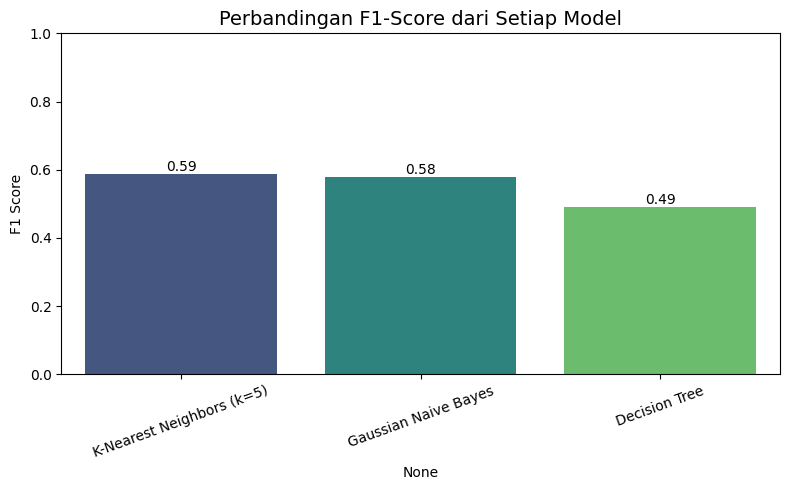


>> Model terbaik berdasarkan F1-Score adalah: **K-Nearest Neighbors (k=5)**


In [29]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===================== Ambil dan siapkan dataset =====================
dataset = fetch_ucirepo(id=503)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

target_col = 'Baselinehistological staging'
df = df.dropna(subset=[target_col])
df[target_col] = df[target_col].replace({1: 0, 2: 0, 3: 1, 4: 1})

X = df.drop(columns=target_col)
y = df[target_col]

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================== Training Model =====================
print("\n==> Melatih model: Gaussian Naive Bayes")
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_model.predict(X_test_scaled)

print("\n==> Melatih model: Decision Tree")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n==> Melatih model: K-Nearest Neighbors")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# ===================== Evaluasi dan Visualisasi =====================
results = {
    "Gaussian Naive Bayes": {
        "accuracy": accuracy_score(y_test, y_pred_gnb),
        "precision": precision_score(y_test, y_pred_gnb),
        "recall": recall_score(y_test, y_pred_gnb),
        "f1": f1_score(y_test, y_pred_gnb)
    },
    "Decision Tree": {
        "accuracy": accuracy_score(y_test, y_pred_dt),
        "precision": precision_score(y_test, y_pred_dt),
        "recall": recall_score(y_test, y_pred_dt),
        "f1": f1_score(y_test, y_pred_dt)
    },
    "K-Nearest Neighbors (k=5)": {
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn),
        "recall": recall_score(y_test, y_pred_knn),
        "f1": f1_score(y_test, y_pred_knn)
    }
}

df_results = pd.DataFrame(results).T
df_results_sorted = df_results.sort_values(by="f1", ascending=False)

print("\n========== PERBANDINGAN MODEL BERDASARKAN METRIK ==========")
print(df_results_sorted)

# ===== Barplot F1 Score tanpa warning + label =====
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=df_results_sorted.index,
    y=df_results_sorted["f1"],
    hue=df_results_sorted.index,
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Perbandingan F1-Score dari Setiap Model", fontsize=14)
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)

# Tambahkan label skor di atas bar
for p in ax.patches:
    f1_val = p.get_height()
    ax.annotate(f"{f1_val:.2f}",
                (p.get_x() + p.get_width() / 2., f1_val),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.tight_layout()
plt.show()

# ===== Model terbaik berdasarkan F1 =====
best_model = df_results_sorted.index[0]
print(f"\n>> Model terbaik berdasarkan F1-Score adalah: **{best_model}**")
